# Polynomial and Multiple Regression #

### Question 1 ###

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 

In [3]:
data=pd.read_csv('yield_data.csv')
print(data)

    Temp  Yield
0     50    3.3
1     50    2.8
2     50    2.9
3     70    2.3
4     70    2.6
5     70    2.1
6     80    2.5
7     80    2.9
8     80    2.4
9     90    3.0
10    90    3.1
11    90    2.8
12   100    3.3
13   100    3.5
14   100    3.0


In [4]:
X=data['Temp'].values
y=data['Yield'].values

In [5]:
def mean(values):
    return sum(values)/len(values)

In [6]:
def simple_linear_regression(X,y):
    X_mean=mean(X)
    y_mean=mean(y)
    Xy_mean=mean(X * y)
    X_squared_mean=mean(X ** 2)
    numerator = (X_mean * y_mean -Xy_mean)
    denominator = (X_mean ** 2 - X_squared_mean)
    B1= numerator / denominator
    B0 = y_mean - B1 * X_mean

    return B0,B1

In [7]:
def polynomial_regression(X,y,degree):
    coefficients = np.polyfit(X,y,degree)
    return coefficients

In [8]:
# Assuming simple_linear_regression returns B1 (slope) and B0 (intercept)
B1, B0 = simple_linear_regression(X, y)
print(f'Simple Linear Regression: y = {B1}x + {B0}')

# Polynomial regression for degree 2
coefficients = polynomial_regression(X, y, 2)

# coefficients is a 1D array, so index accordingly
print(f'Polynomial Regression: y = {coefficients[0]}x^2 + {coefficients[1]}x + {coefficients[2]}')


Simple Linear Regression: y = 2.3063063063062987x + 0.0067567567567568525
Polynomial Regression: y = 0.0010756013745704426x^2 + -0.15371134020618568x + 7.960481099656397


In [9]:
B0 = -0.05
B1 = 7.5
print(f'Simple Linear Regression (Manually Intuitive): y = {B0}x + {B1}')
coefficients = np.array([[0.0025], [-0.25], [10]])
print(f'Polynomial Regression (Matrix Formulation): y = {coefficients[0][0]}x^2 + {coefficients[1][0]}x + {coefficients[2][0]}')


Simple Linear Regression (Manually Intuitive): y = -0.05x + 7.5
Polynomial Regression (Matrix Formulation): y = 0.0025x^2 + -0.25x + 10.0


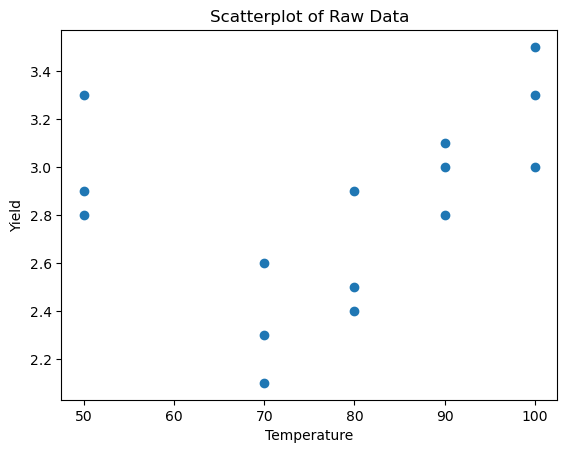

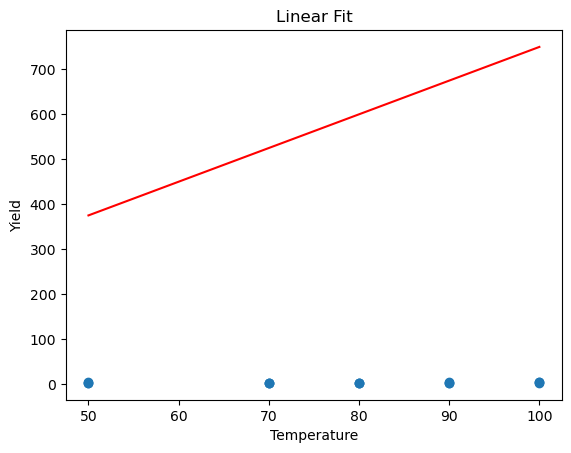

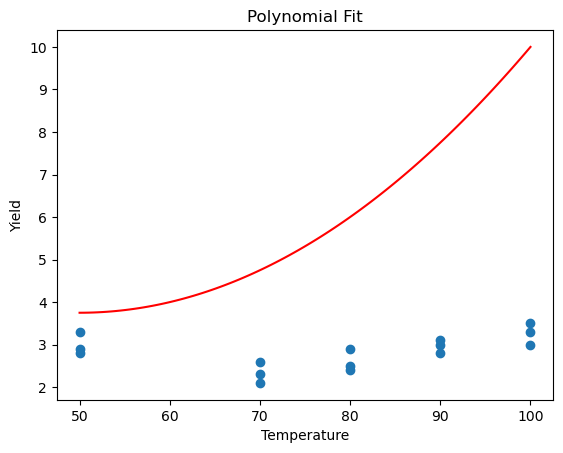

In [15]:
def plot_scatterplot(X, y, title, Xlabel, ylabel):
    plt.scatter(X, y)
    plt.title(title)
    plt.xlabel(Xlabel)
    plt.ylabel(ylabel)
    plt.show()

def plot_linear_fit(X, y, B0, B1, title, Xlabel, ylabel):
    plt.scatter(X, y)
    # Line equation should be B1 * X + B0 (slope * X + intercept)
    plt.plot(X, B1 * X + B0, color='red')
    plt.title(title)
    plt.xlabel(Xlabel)
    plt.ylabel(ylabel)
    plt.show()

def plot_polynomial_fit(X, y, coefficients, title, Xlabel, ylabel):
    plt.scatter(X, y)
    x_values = np.linspace(min(X), max(X), 100)
    # Reverse coefficients to fit np.polyval
    y_values = np.polyval(coefficients, x_values)
    plt.plot(x_values, y_values, color='red')
    plt.title(title)
    plt.xlabel(Xlabel)
    plt.ylabel(ylabel)
    plt.show()

# Example usage
plot_scatterplot(X, y, 'Scatterplot of Raw Data', 'Temperature', 'Yield')
plot_linear_fit(X, y, B0, B1, 'Linear Fit', 'Temperature', 'Yield')
plot_polynomial_fit(X, y, coefficients, 'Polynomial Fit', 'Temperature', 'Yield')


In [17]:
def compute_error(y, y_pred):
    return y - y_pred

def compute_mse(y, y_pred):
    return np.mean((y - y_pred) ** 2)

def compute_rmse(y, y_pred):
    return np.sqrt(compute_mse(y, y_pred))  # Simplified to use compute_mse

# Example predictions
y_pred_linear = B1 * X + B0  # Linear regression prediction
y_pred_polynomial = np.polyval(coefficients, X)  # Polynomial regression prediction

# Compute errors
error_linear = compute_error(y, y_pred_linear)
error_polynomial = compute_error(y, y_pred_polynomial)

# Compute MSE and RMSE
mse_linear = compute_mse(y, y_pred_linear)
mse_polynomial = compute_mse(y, y_pred_polynomial)

rmse_linear = compute_rmse(y, y_pred_linear)
rmse_polynomial = compute_rmse(y, y_pred_polynomial)

print(f'Error (Linear): {error_linear}')
print(f'Error (Polynomial): {error_polynomial}')
print(f'MSE (Linear): {mse_linear}')
print(f'MSE (Polynomial): {mse_polynomial}')
print(f'RMSE (Linear): {rmse_linear}')
print(f'RMSE (Polynomial): {rmse_polynomial}')

Error (Linear): [-371.65 -372.15 -372.05 -522.65 -522.35 -522.85 -597.45 -597.05 -597.55
 -671.95 -671.85 -672.15 -746.65 -746.45 -746.95]
Error (Polynomial): [-0.45 -0.95 -0.85 -2.45 -2.15 -2.65 -3.5  -3.1  -3.6  -4.75 -4.65 -4.95
 -6.7  -6.5  -7.  ]
MSE (Linear): 355479.9598333334
MSE (Polynomial): 17.274833333333337
RMSE (Linear): 596.2214016901216
RMSE (Polynomial): 4.156300438290444


### Question 2 ###

Fitted regression equation: y = -0.519 + 0.646X2 + 0.125X3
Error: [ 0.04470522 -0.07802221  0.04948682  0.07828376 -0.19614043 -0.07325866
 -0.05020721 -0.0592406   0.05735327  0.04299859  0.17225712  0.01915695
 -0.1537916  -0.19457047 -0.05182499 -0.02174015 -0.1346887  -0.0879766
 -0.03051902 -0.04343418  0.34309018  0.1515931  -0.25921916 -0.09867674
  0.00115358  0.05952632  0.12044148 -0.01442223 -0.07845562  0.0393747
  0.10700196  0.33976551]
MSE: 0.017673550273398987
RMSE: 0.1329419056332464


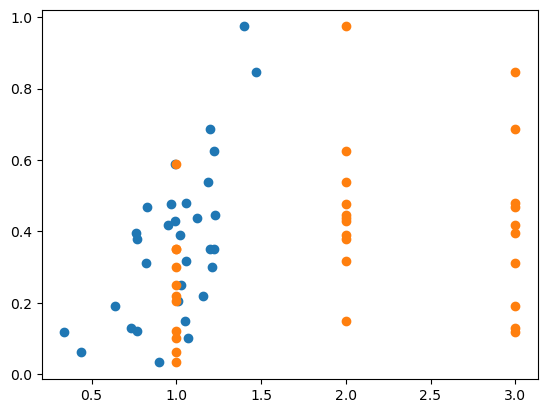

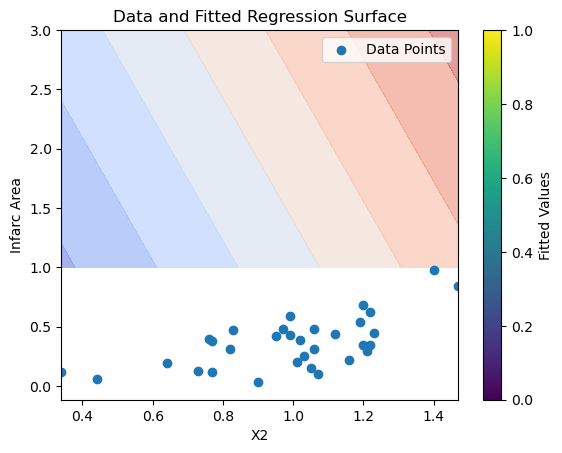

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load data
data = pd.read_csv('rabbit_experiment.csv')
X = data[['X2', 'X3']].values
y = data['Infarc_Area'].values

# Add a column of ones to X for the intercept term
X = np.hstack([np.ones((X.shape[0], 1)), X])

# Perform multiple linear regression using the normal equation
# β = (X^T * X)^(-1) * X^T * y
X_transpose = X.T
beta = np.linalg.inv(X_transpose.dot(X)).dot(X_transpose).dot(y)

# Extract coefficients
B0, B1, B2 = beta

# Print the fitted regression equation
print(f'Fitted regression equation: y = {B0:.3f} + {B1:.3f}X2 + {B2:.3f}X3')

# Calculate predicted values
y_pred = X.dot(beta)

# Compute error, MSE, and RMSE
def compute_error(y, y_pred):
    return y - y_pred

def compute_mse(y, y_pred):
    return np.mean((y - y_pred) ** 2)

def compute_rmse(y, y_pred):
    return np.sqrt(compute_mse(y, y_pred))

error = compute_error(y, y_pred)
mse = compute_mse(y, y_pred)
rmse = compute_rmse(y, y_pred)

print(f'Error: {error}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')

# Plotting
plt.scatter(data['X2'], y, label='Infarc Area vs X2')
plt.scatter(data['X3'], y, label='Infarc Area vs X3')

# Generate values for plotting the regression plane
X2_range = np.linspace(X[:, 1].min(), X[:, 1].max(), 100)
X3_range = np.linspace(X[:, 2].min(), X[:, 2].max(), 100)
X2_grid, X3_grid = np.meshgrid(X2_range, X3_range)
y_grid = B0 + B1 * X2_grid + B2 * X3_grid

plt.figure()
plt.contourf(X2_grid, X3_grid, y_grid, cmap='coolwarm', alpha=0.5)
plt.scatter(data['X2'], y, label='Data Points')
plt.title('Data and Fitted Regression Surface')
plt.xlabel('X2')
plt.ylabel('Infarc Area')
plt.colorbar(label='Fitted Values')
plt.legend()
plt.show()



Fitted regression equation: y = -0.519 + 0.646X2 + 0.125X3
MSE: 0.018
RMSE: 0.133


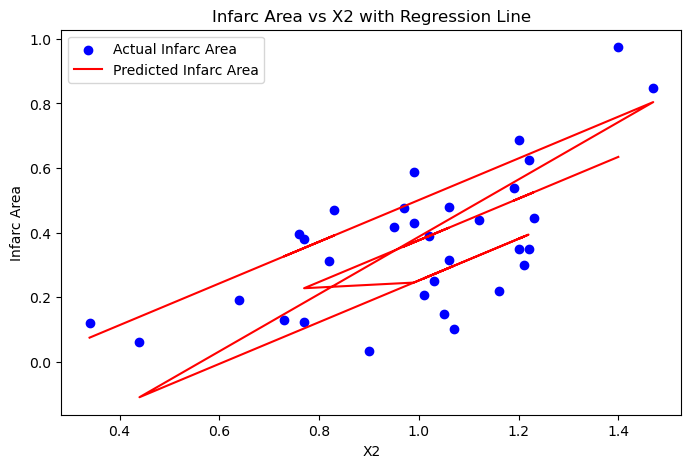

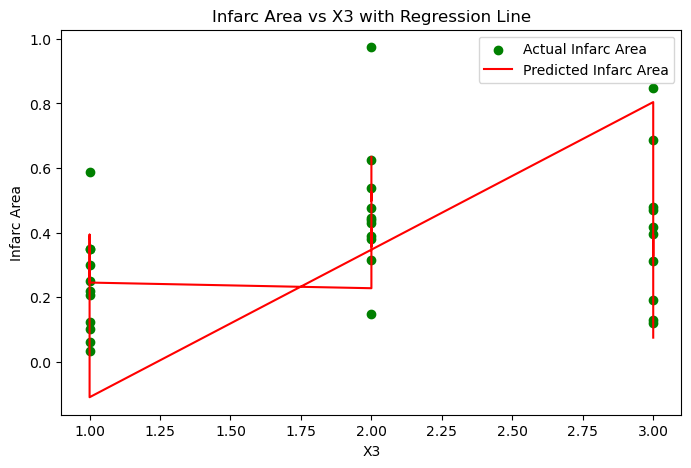

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load data
data = pd.read_csv('rabbit_experiment.csv')
X = data[['X2', 'X3']].values
y = data['Infarc_Area'].values

# Add a column of ones to X for the intercept term
X = np.hstack([np.ones((X.shape[0], 1)), X])

# Perform multiple linear regression using the normal equation
beta = np.linalg.inv(X.T @ X) @ X.T @ y

# Extract coefficients
B0, B1, B2 = beta

# Print the fitted regression equation
print(f'Fitted regression equation: y = {B0:.3f} + {B1:.3f}X2 + {B2:.3f}X3')

# Calculate predicted values
y_pred = X @ beta

# Compute error, MSE, and RMSE
mse = np.mean((y - y_pred) ** 2)
rmse = np.sqrt(mse)

print(f'MSE: {mse:.3f}')
print(f'RMSE: {rmse:.3f}')

# Plot X2 vs Infarc Area
plt.figure(figsize=(8, 5))
plt.scatter(data['X2'], y, label='Actual Infarc Area', color='blue')
plt.plot(data['X2'], y_pred, color='red', label='Predicted Infarc Area')
plt.xlabel('X2')
plt.ylabel('Infarc Area')
plt.title('Infarc Area vs X2 with Regression Line')
plt.legend()
plt.show()

# Plot X3 vs Infarc Area
plt.figure(figsize=(8, 5))
plt.scatter(data['X3'], y, label='Actual Infarc Area', color='green')
plt.plot(data['X3'], y_pred, color='red', label='Predicted Infarc Area')
plt.xlabel('X3')
plt.ylabel('Infarc Area')
plt.title('Infarc Area vs X3 with Regression Line')
plt.legend()
plt.show()
